What ifs?
What if the Earth’s solar system was a binary star system?  As an undergraduate student, we discussed in astrophysics class the idea that had Jupiter accumulated more mass, it may have become massive enough to ignite fusion and become a star.  Of course, had this occurred early on in our solar system’s development, there would be a much different structure and planetary composition than we have today, including the likelihood that the Earth would not exist as we know it, if at all.

An assumption in this project will be that the solar system developed as-is into its current configuration.  The first goal will be to develop an eight-planet solar system model with the known planets (Mercury, Venus, Earth, Mars, Jupiter, Saturn, Uranus, and Neptune) and their masses and orbital mechanics, along with the Sun.  Animating the current configuration will be a part of this.


In [1]:
import numpy as np
import finalprojectfunctions as fpf
import finalprojectconstants as fpconst
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Initial positions and velocities of the planets (m, m/s)
initial_conditions = {
    "Sun": np.array([0.0, 0.0, 0.0, 0.0]),
    "Mercury": np.array([0.466 * 1.496e11, 0.0, 0.0, 5.0e4]),
    "Venus": np.array([0.723 * 1.496e11, 0.0, 0.0, 3.5e4]),
    "Earth": np.array([1.0 * 1.496e11, 0.0, 0.0, 3.0e4]),
    "Mars": np.array([1.524 * 1.496e11, 0.0, 0.0, 2.5e4]),
    "Jupiter": np.array([5.203 * 1.496e11, 0.0, 0.0, 1.0e4]),
    "Saturn": np.array([9.537 * 1.496e11, 0.0, 0.0, 0.6e4]),
    "Uranus": np.array([19.191 * 1.496e11, 0.0, 0.0, 0.5e4]),
    "Neptune": np.array([30.069 * 1.496e11, 0.0, 0.0, 0.4e4])
}

# Set up initial conditions array
y0 = np.zeros((len(initial_conditions), 4))
for i, (planet, _) in enumerate(initial_conditions.items()):
    y0[i, :] = np.concatenate(([initial_conditions[planet][0]], [initial_conditions[planet][1]], [initial_conditions[planet][2]], [initial_conditions[planet][3]]))

# Solve the system of differential equations
solution = solve_ivp(fpf.planetary_motion, [0, 3.154e7], y0.flatten(), dense_output=True)

# Plot the trajectories of the planets
for i, (planet, _) in enumerate(initial_conditions.items()):
    plt.plot(solution.sol.t, solution.sol.y[i*4], label=planet)

plt.xlabel('Time (s)')
plt.ylabel('Position (m)')
plt.title('Trajectories of Planets in the Solar System')
plt.legend()
plt.grid(True)
plt.show()


pygame 2.5.2 (SDL 2.28.3, Python 3.11.5)
Hello from the pygame community. https://www.pygame.org/contribute.html


TypeError: cannot unpack non-iterable numpy.float64 object

In [3]:
import pygame
import math
pygame.init()

WIDTH, HEIGHT = 800, 800
WIN = pygame.display.set_mode((WIDTH, HEIGHT))
pygame.display.set_caption("Planet Simulator")

WHITE = (255, 255, 255)
YELLOW = (255, 255, 0)
BLUE = (100, 149, 237)
RED = (188, 39, 50)
DARK_GREY = (80, 78, 81)

FONT = pygame.font.SysFont("comicsans", 16)

class Planet:
    AU = 149.6e6 * 1000 # in meters
    G = 6.67428e-11
    SCALE = 250 / AU # 1 AU = 100 pixels
    TIMESTEP = 3600*24 # number of seconds in a day

    def __init__(self, x, y, radius, color, mass):
        self.x = x
        self.y = y 
        self.radius = radius
        self.color = color
        self.mass = mass
        self.orbit = []
        self.sun = False
        self.distance_to_sun = 0
        self.x_vel = 0
        self.y_vel = 0

    def draw(self, win):
        x = self.x * self.SCALE + WIDTH / 2
        y = self.y * self.SCALE + HEIGHT / 2
        
        if len(self.orbit) > 2:
            updated_points = []
            for point in self.orbit:
                x, y = point
                x = x * self.SCALE + WIDTH / 2
                y = y * self.SCALE + HEIGHT / 2
                updated_points.append(point)
            
            pygame.draw.lines(win, self.color, False, updated_points, 2)

        pygame.draw.circle(win, self.color, (x, y), self.radius)
        if not self.sun:
            distance_text = FONT.render(f"{round(self.distance_to_sun/1000, 1)}km", 1, WHITE)
            WIN.blit(distance_text, (x - distance_text.get_width()/2, y - distance_text.get_height()/2))
        
    def attraction(self, other):
        other_x, other_y = other.x, other.y
        distance_x = other_x - self.x
        distance_y = other_y - self.y
        distance = math.sqrt(distance_x ** 2 + distance_y ** 2)

        if other.sun:
            self.distance_to_sun = distance

        force = self.G * self.mass * other.mass / distance**2
        theta = math.atan2(distance_y, distance_x)
        force_x = math.cos(theta) * force
        force_y = math.sin(theta) * force
        return force_x, force_y

    def update_position(self, planets):
        total_fx = total_fy = 0
        for planet in planets:
            if self == planet:
                continue

            fx, fy = self.attraction(planet)
            total_fx += fx
            total_fx += fy

        self.x_vel += total_fx / self.mass * self.TIMESTEP
        self.y_vel += total_fy / self.mass * self.TIMESTEP

        self.x += self.x_vel * self.TIMESTEP
        self.y += self.y_vel * self.TIMESTEP
        self.orbit.append((self.x, self.y))

def main():
    run = True
    clock = pygame.time.Clock()

    sun = Planet(0, 0 , 30, YELLOW, 1.98892 * 10**30)
    sun.sun = True
    mercury = Planet(0.387 * Planet.AU, 0, 8, DARK_GREY, 3.30 * 10**23)
    mercury.y_vel = -47.4 * 1000
    venus = Planet(0.723 * Planet.AU, 0, 14, WHITE, 4.8685 * 10**24)
    venus.y_vel = -35.02 * 1000
    earth = Planet(-1 * Planet.AU, 0, 16, BLUE, 5.9742 * 10**24)
    earth.y_vel = 29.783 * 1000
    mars = Planet(-1.524 * Planet.AU, 0, 12, WHITE, 6.39 * 10**23)
    mars.y_vel = 24.077 * 1000

    planets = [sun, mercury, venus, earth, mars]
    
    while run:
        clock.tick(60)
        WIN.fill((0, 0, 0))
        pygame.display.update()
        
        for  event in pygame.event.get():
            if event.type == pygame.QUIT:
                run = False

        for planet in planets:
            planet.update_position(planets)
            planet.draw(WIN)
            
    pygame.quit()
    

In [5]:
main()


KeyboardInterrupt: 

In [1]:
from vpython import*
scene = canvas()

#Web VPython 3.2
G = 6.67e-11
AU = 1.496e+11

sun = sphere(pos=vector(0,0,0),radius=AU/20, color=color.yellow, m=1988500e24)
mercury=sphere(pos = vector(57.909e9,0,0),radius=AU/40,make_trail=True)
mercury.v = vector(0,47.36e3,0)
venus=sphere(pos = vector(0.728213*AU,0,0),radius=AU/40,make_trail=True,color=color.cyan)
venus.v=vector(0,35.02e3,0)
earth=sphere(pos = vector(AU,0,0),radius=AU/40,make_trail=True,texture=textures.earth)
earth.v=vector(0,29.78e3,0)

planets=[mercury,venus,earth]

t = 0
dt = 3600

while t<3600*20*100:
  rate(1000)
  for p in planets:
    p.a = -G*sun.m*norm(p.pos)/mag(p.pos)**2
    p.v = p.v + p.a*dt
    p.pos = p.pos + p.v*dt
  t = t + dt
  


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

AttributeError: module 'notebook' has no attribute 'nbextensions'

In [2]:
#GlowScript 2.7 VPython
graph(fast=False)
def gforce(p1,p2):
    # Calculate the gravitational force exerted on p1 by p2.
    G = 1 # Change to 6.67e-11 to use real-world values.
    # Calculate distance vector between p1 and p2.
    r_vec = p1.pos-p2.pos
    # Calculate magnitude of distance vector.
    r_mag = mag(r_vec)
    # Calcualte unit vector of distance vector.
    r_hat = r_vec/r_mag
    # Calculate force magnitude.
    force_mag = G*p1.mass*p2.mass/r_mag**2
    # Calculate force vector.
    force_vec = -force_mag*r_hat
    
    return force_vec

def ke(p1):
    # Calculate the kinetic energy of p1.
    ke = 0.5*mag(p1.momentum)**2/p1.mass
    
    return ke
    
def gpe(p1,p2):
    # Calculate the gravitational potential energy between p1 and p2.
    G = 1 # Change to 6.67e-11 to use real-world values.
    # Calculate distance vector between p1 and p2.
    r_vec = p1.pos-p2.pos
    # Calculate magnitude of distance vector.
    r_mag = mag(r_vec)
    # Calculate gravitational potential energy.
    gpe = -G*p1.mass*p2.mass/r_mag
    
    return gpe
    
star = sphere( pos=vector(0,0,0), radius=0.2, color=color.yellow,
               mass = 1000, momentum=vector(0,0,0), make_trail=True )
               
planet1 = sphere( pos=vector(1,0,0), radius=0.05, color=color.blue,
                  mass = 1, momentum=vector(0,30,0), make_trail=True )

planet2 = sphere( pos=vector(0,3,0), radius=0.075, color=color.red,
                  mass = 2, momentum=vector(-35,0,0), make_trail=True )
                  
planet3 = sphere( pos=vector(0,-4,0), radius=0.1, color=color.green,
                  mass = 10, momentum=vector(160,0,0), make_trail=True )
               
comet = sphere( pos=vector(-6,6,0), radius=0.05, color=color.white,
                mass = 0.5, momentum=vector(-1,-1,0), make_trail=True )
                
tail = cone( pos=comet.pos, axis=comet.pos-star.pos, 
             size=vector(1,1,1)*comet.radius, color=color.white )

print("planet1 energy = ",ke(planet1)+gpe(planet1,star))
print("planet2 energy = ",ke(planet2)+gpe(planet2,star))
print("planet3 energy = ",ke(planet3)+gpe(planet3,star))
print("comet energy = ",ke(comet)+gpe(comet,star))

dt = 0.0001
t = 0
while (True):
    rate(1000)
    
    # Calculate forces.
    star.force = gforce(star,planet1)+gforce(star,planet2)+gforce(star,planet3)
    planet1.force = gforce(planet1,star)+gforce(planet1,planet2)+gforce(planet1,planet3)
    planet2.force = gforce(planet2,star)+gforce(planet2,planet1)+gforce(planet2,planet3)
    planet3.force = gforce(planet3,star)+gforce(planet3,planet1)+gforce(planet3,planet2)
    comet.force = gforce(comet,star)

    # Update momenta.
    star.momentum = star.momentum + star.force*dt
    planet1.momentum = planet1.momentum + planet1.force*dt
    planet2.momentum = planet2.momentum + planet2.force*dt
    planet3.momentum = planet3.momentum + planet3.force*dt
    comet.momentum = comet.momentum + comet.force*dt

    # Update positions.
    star.pos = star.pos + star.momentum/star.mass*dt
    planet1.pos = planet1.pos + planet1.momentum/planet1.mass*dt
    planet2.pos = planet2.pos + planet2.momentum/planet2.mass*dt
    planet3.pos = planet3.pos + planet3.momentum/planet3.mass*dt
    comet.pos = comet.pos + comet.momentum/comet.mass*dt
    tail.pos = comet.pos+comet.radius*vector(1,1,1)
    tail.axis = comet.pos-star.pos
    tail.axis = tail.axis/mag(tail.axis)
    
    t = t + dt

AttributeError: module 'notebook' has no attribute 'nbextensions'

In [1]:
# Enable interactive plot
%matplotlib notebook

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

fig, ax = plt.subplots()
line, = ax.plot([])     # A tuple unpacking to unpack the only plot
ax.set_xlim(0, 2*np.pi)
ax.set_ylim(-1.1, 1.1)

def animate(frame_num):
    y = np.sin(x + 2*np.pi * frame_num/100)
    line.set_data((x, y))
    return line

anim = FuncAnimation(fig, animate, frames=100, interval=20)
plt.show()


<IPython.core.display.Javascript object>

In [1]:
# vectors.py

import math

class Vector:
    def __init__(self, x=0.0, y=0.0, z=0.0):
        self.x = x
        self.y = y
        self.z = z

    def __repr__(self):
        return f"Vector({self.x}, {self.y}, {self.z})"

    def __str__(self):
        return f"{self.x}i + {self.y}j + {self.z}k"

    def __getitem__(self, item):
        if item == 0:
            return self.x
        elif item == 1:
            return self.y
        elif item == 2:
            return self.z
        else:
            raise IndexError("There are only three elements in the vector")

    def __add__(self, other):
        return Vector(
            self.x + other.x,
            self.y + other.y,
            self.z + other.z,
        )

    def __sub__(self, other):
        return Vector(
            self.x - other.x,
            self.y - other.y,
            self.z - other.z,
        )

    def __mul__(self, other):
        if isinstance(other, Vector):  # Vector dot product
            return (
                self.x * other.x
                + self.y * other.y
                + self.z * other.z
            )
        elif isinstance(other, (int, float)):  # Scalar multiplication
            return Vector(
                self.x * other,
                self.y * other,
                self.z * other,
            )
        else:
            raise TypeError("operand must be Vector, int, or float")

    def __truediv__(self, other):
        if isinstance(other, (int, float)):
            return Vector(
                self.x / other,
                self.y / other,
                self.z / other,
            )
        else:
            raise TypeError("operand must be int or float")

    def get_magnitude(self):
        return math.sqrt(self.x ** 2 + self.y ** 2 + self.z ** 2)

    def normalize(self):
        magnitude = self.get_magnitude()
        return Vector(
            self.x / magnitude,
            self.y / magnitude,
            self.z / magnitude,
        )


In [2]:
# solar_system_3d.py
from http.server import BaseHTTPRequestHandler, HTTPServer
import os
import platform
import sys
import threading
import json
import webbrowser as _webbrowser
import asyncio
from autobahn.asyncio.websocket import WebSocketServerProtocol, WebSocketServerFactory
import txaio
import copy
import socket
import multiprocessing

import signal
from urllib.parse import unquote
import itertools
import math
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

from solarsystemvectorclass import Vector

class SolarSystem:
    def __init__(self, size, projection_2d=False):
        self.size = size
        self.projection_2d = projection_2d
        self.bodies = []

        self.fig, self.ax = plt.subplots(
            1,
            1,
            subplot_kw={"projection": "3d"},
            figsize=(self.size / 50, self.size / 50),
        )
        self.fig.tight_layout()
        if self.projection_2d:
            self.ax.view_init(10, 0)
        else:
            self.ax.view_init(0, 0)

    def add_body(self, body):
        self.bodies.append(body)

    def update_all(self):
        self.bodies.sort(key=lambda item: item.position[0])
        for body in self.bodies:
            body.move()
            body.draw()

    def draw_all(self):
        self.ax.set_xlim((-self.size / 2, self.size / 2))
        self.ax.set_ylim((-self.size / 2, self.size / 2))
        self.ax.set_zlim((-self.size / 2, self.size / 2))
        if self.projection_2d:
            self.ax.xaxis.set_ticklabels([])
            self.ax.yaxis.set_ticklabels([])
            self.ax.zaxis.set_ticklabels([])
        else:
            self.ax.axis(False)
        plt.pause(0.001)
        self.ax.clear()

    def calculate_all_body_interactions(self):
        bodies_copy = self.bodies.copy()
        for idx, first in enumerate(bodies_copy):
            for second in bodies_copy[idx + 1:]:
                first.accelerate_due_to_gravity(second)

class SolarSystemBody:
    min_display_size = 10
    display_log_base = 1.3

    def __init__(
        self,
        solar_system,
        mass,
        position=(0, 0, 0),
        velocity=(0, 0, 0),
    ):
        self.solar_system = solar_system
        self.mass = mass
        self.position = position
        self.velocity = Vector(*velocity)
        self.display_size = max(
            math.log(self.mass, self.display_log_base),
            self.min_display_size,
        )
        self.colour = "black"

        self.solar_system.add_body(self)

    def move(self):
        self.position = (
            self.position[0] + self.velocity[0],
            self.position[1] + self.velocity[1],
            self.position[2] + self.velocity[2],
        )

    def draw(self):
        self.solar_system.ax.plot(
            *self.position,
            marker="o",
            markersize=self.display_size + self.position[0] / 30,
            color=self.colour
        )
        if self.solar_system.projection_2d:
            self.solar_system.ax.plot(
                self.position[0],
                self.position[1],
                -self.solar_system.size / 2,
                marker="o",
                markersize=self.display_size / 2,
                color=(.5, .5, .5),
            )

    def accelerate_due_to_gravity(self, other):
        distance = Vector(*other.position) - Vector(*self.position)
        distance_mag = distance.get_magnitude()

        force_mag = self.mass * other.mass / (distance_mag ** 2)
        force = distance.normalize() * force_mag

        reverse = 1
        for body in self, other:
            acceleration = force / body.mass
            body.velocity += acceleration * reverse
            reverse = -1

class Sun(SolarSystemBody):
    def __init__(
        self,
        solar_system,
        mass=10_000,
        position=(0, 0, 0),
        velocity=(0, 0, 0),
    ):
        super(Sun, self).__init__(solar_system, mass, position, velocity)
        self.colour = "yellow"

class Planet(SolarSystemBody):
    colours = itertools.cycle([(1, 0, 0), (0, 1, 0), (0, 0, 1)])

    def __init__(
        self,
        solar_system,
        mass=10,
        position=(0, 0, 0),
        velocity=(0, 0, 0),
    ):
        super(Planet, self).__init__(solar_system, mass, position, velocity)
        self.colour = next(Planet.colours)


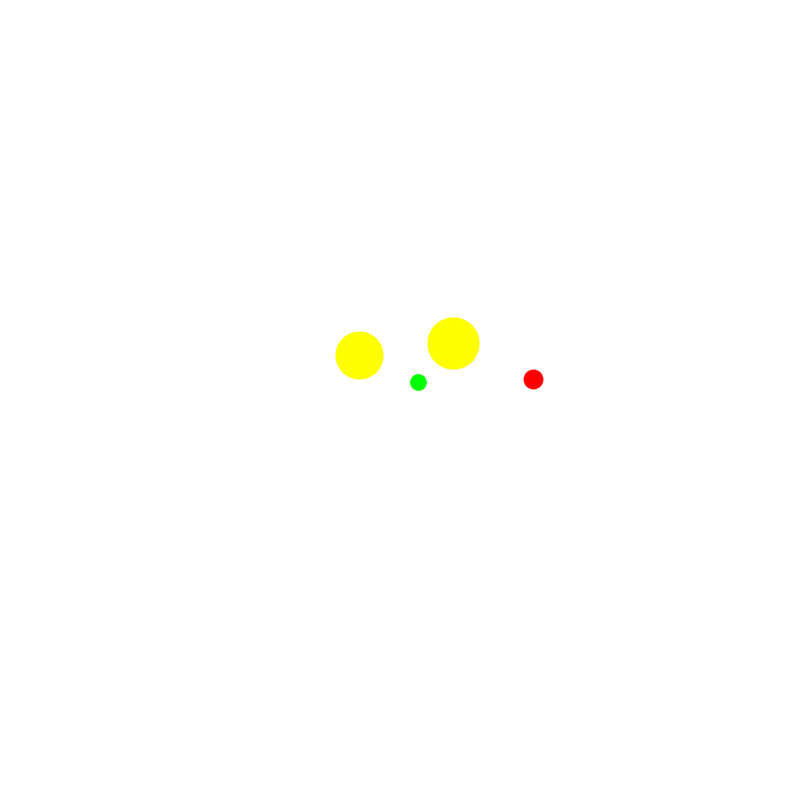

KeyboardInterrupt: 

In [3]:
# binary_star_system.py

from solar_system_3d import SolarSystem, Sun, Planet

#solar_system = SolarSystem(400, projection_2d=True)

solar_system = SolarSystem(400)

suns = (
    Sun(solar_system, position=(40, 40, 40), velocity=(6, 0, 6)),
    Sun(solar_system, position=(-40, -40, 40), velocity=(-6, 0, -6)),
)

planets = (
    Planet(
        solar_system,
        10,
        position=(100, 100, 0),
        velocity=(0, 5.5, 5.5),
    ),
    Planet(
        solar_system,
        20,
        position=(0, 0, 0),
        velocity=(-11, 11, 0),
    ),
)

while True:
    solar_system.calculate_all_body_interactions()
    solar_system.update_all()
    solar_system.draw_all()


In [ ]:
import turtle
import math
import random

# quantity of miles to scale down universe by
scale = 75000

# make the "space" black
screen = turtle.Screen()
screen.bgcolor("black")
screen.colormode(255)

# generate sun turtle and move it to the center
sun = turtle.Turtle()
sun.setposition(0,0)

# set the sun's color, and get ready to fill the shape with the color
sun.color([255, 204, 51])
sun.begin_fill()

# set a planetary scale to make the planets larger
planetScale = 100

# calculate the rescaled sun's radius
sunRadius = 432690 / scale

# circumference is 2 * pi * radius
sunCircumference = 2 * math.pi * sunRadius

# draw a circle to represent the sun–divide circumference by 36 to move forward incrementially
# each line of the circle builds into a full circle–by turning by a small degree each time
for i in range(36):
  sun.forward(sunCircumference / 36)
  sun.right(10)

# finish drawing the sun, so fill its color
sun.end_fill()

# hide the sun's turtle after done drawing
sun.hideturtle()

# generate planet turtle to draw our planet
planet = turtle.Turtle()
planet.speed()

## Draw the planetary orbit; uncomment lines below to draw orbits
# orbit = turtle.Turtle()
# orbit.color("white")

# Draw a planet given a list of colors [r,g,b], the distance from the sun, and the radius of the planet
def drawPlanet(color, distance, radius):
  # scale the given radius by a planet scaler to make it larger, then divide it by the largest scale
  radius = radius * planetScale / scale
  # calculate circumference given new radius 
  circumference = 2 * math.pi * radius
  print(circumference)
  
  # add up all radii and scaled distances to calculate scaled distance from the sun, then divide by a new scale to make it appear on the screen
  distFromSun = sunRadius + ((radius + distance) / scale) / 50
  
  ## Draw the planetary orbit; uncomment lines below and above to draw orbits
  # orbit.penup()
  # orbit.setposition(0,0)
  # orbit.showturtle()
  
  # orbit.setheading(0)
  # orbit.forward(distFromSun)
  # orbit.setheading(270)
  # orbitCircumference = 2 * math.pi * distFromSun
  
  # orbit.pendown()
  # for i in range(36):
  #   orbit.forward(orbitCircumference / 36)
  #   orbit.right(10)
    
  # orbit.hideturtle()
  
  # extract rgb variables from passed color list
  r = color[0]
  g = color[1]
  b = color[2]
  
  # rest planet to start position
  planet.setposition(0,0)

  # set the planet to move in a random direction
  planet.setheading(random.randint(0,360))

  # make planet visible, set color, penup to get ready to move
  planet.showturtle()
  planet.color(r,g,b)
  planet.penup()
  
  # move planet forward to correct position
  planet.forward(distFromSun)

  # get ready to draw and fill a shape
  planet.pendown()
  planet.begin_fill()

  # draw a circle based on calculated circumference
  for i in range(36):
    planet.forward(circumference / 36)
    planet.right(10)
  
  # stop the fill into the planet, ending it with a full shape
  planet.end_fill()

  # hide the turtle again and stop drawing
  planet.hideturtle()
  planet.penup()

## Draw all the planets! ##
# draw mercury
drawPlanet([151, 151, 159], 35980000, 1516)
  
# venus
drawPlanet([211, 156, 126], 67240000, 3760.4)

# earth
drawPlanet([140, 177, 222], 92950000, 3958.8)

# mars
drawPlanet([198, 123, 92], 141600000, 2106.1)

# jupiter
drawPlanet([211, 156, 126], 483800000, 43441)

# saturn
drawPlanet([197, 171, 110], 890000000, 36184)

# uranus
drawPlanet([213, 251, 252], 1784000000, 15759)

# neptune
drawPlanet([62, 84, 232], 2793000000, 15299)


### BACKGROUND INFORMATION – COLOR, DISTANCE, RADIUS ###
### RGB Codes ###
# Sun: (255, 204, 51) - [255, 204, 51]
# Mercury: (151, 151, 159) - [151, 151, 159]
# Venus: (211, 156, 126) - [211, 156, 126]
# Earth: (140, 177, 222) - [140, 177, 222]
# Mars: (198, 123, 92) - [198, 123, 92]
# Jupiter: (211, 156, 126) - [211, 156, 126]
# Saturn: (197, 171, 110) - [197, 171, 110]
# Uranus: (213, 251, 252) - [213, 251, 252]
# Neptune: (62, 84, 232) - [62, 84, 232]

### Planetary Distance from Sun (miles) ###
# Sun: 0 mi
# Mercury: 35.98 million mi
# Venus: 67.24 million mi
# Earth: 92.96 million mi
# Mars: 141.6 million mi
# Jupiter: 483.8 million mi
# Saturn: 890.9 million mi
# Uranus: 1.784 billion mi
# Neptune: 2.793 billion mi

### Planetary Radii (miles) ###
# Sun: 432690 mi
# Mercury: 1516 mi
# Venus: 3760.4 mi
# Earth: 3958.8 mi
# Mars: 2106.1 mi
# Jupiter: 43441 mi
# Saturn: 36184 mi
# Uranus: 15759 mi
# Neptune: 15299 mi


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
G = 6.67430e-11  # Gravitational constant (m^3 kg^-1 s^-2)

# Function to calculate gravitational acceleration
def gravitational_acceleration(r, M):
    # r: distance vector from the object to the larger body
    # M: mass of the larger body
    return -G * M / np.linalg.norm(r)**3 * r

# Function to simulate the trajectory of the object
def simulate_trajectory(r0, v0, M, dt, t_max):
    # r0: initial position vector of the object
    # v0: initial velocity vector of the object
    # M: mass of the larger body
    # dt: time step for numerical integration
    # t_max: maximum simulation time
    
    # Initialize arrays to store position and velocity
    num_steps = int(t_max / dt)
    t_values = np.linspace(0, t_max, num_steps)
    r_values = np.zeros((num_steps, 2))
    v_values = np.zeros((num_steps, 2))
    
    # Set initial conditions
    r_values[0] = r0
    v_values[0] = v0
    
    # Perform numerical integration using Euler's method
    for i in range(1, num_steps):
        # Calculate gravitational acceleration
        a = gravitational_acceleration(r_values[i-1], M)
        
        # Update velocity and position using Euler's method
        v_values[i] = v_values[i-1] + a * dt
        r_values[i] = r_values[i-1] + v_values[i] * dt
        
    return t_values, r_values, v_values

# Function to check for capture into a stable orbit
def check_for_capture(r_values, v_values):
    # Check if the object's trajectory crosses a threshold distance from the larger body
    # and if its velocity is within a certain range for capture
    
    # Define threshold distance and capture velocity range (for demonstration purposes)
    threshold_distance = 1.5e7  # Threshold distance from the larger body (m)
    capture_velocity_min = 0.9  # Minimum capture velocity (relative to circular orbit)
    capture_velocity_max = 1.1  # Maximum capture velocity (relative to circular orbit)
    
    # Calculate distance from the larger body at each time step
    distances = np.linalg.norm(r_values, axis=1)
    
    # Find the index where the object crosses the threshold distance
    capture_index = np.argmax(distances > threshold_distance)
    
    if capture_index == 0:
        return False  # Object did not cross threshold distance
    
    # Check if the velocity at capture is within the specified range
    v_capture = np.linalg.norm(v_values[capture_index])
    v_circular_orbit = np.sqrt(G * M / threshold_distance)  # Velocity for circular orbit
    if capture_velocity_min * v_circular_orbit <= v_capture <= capture_velocity_max * v_circular_orbit:
        return True  # Object captured into stable orbit
    else:
        return False  # Object did not meet capture criteria

# Main function to run the simulation
def main():
    # Initial conditions
    r0 = np.array([1.0e7, 0])  # Initial position vector of the object (m)
    v0 = np.array([0, 1.0e3])  # Initial velocity vector of the object (m/s)
    M = 5.972e24  # Mass of the larger body (kg)
    dt = 1000  # Time step for numerical integration (s)
    t_max = 100000  # Maximum simulation time (s)
    
    # Simulate trajectory
    t_values, r_values, v_values = simulate_trajectory(r0, v0, M, dt, t_max)
    
    # Check for capture
    captured = check_for_capture(r_values, v_values)
    
    # Plot trajectory
    plt.plot(r_values[:, 0], r_values[:, 1])
    plt.xlabel('x (m)')
    plt.ylabel('y (m)')
    plt.title('Object Trajectory')
    plt.grid(True)
    plt.axis('equal')
    plt.show()
    
    if captured:
        print("Object captured into stable orbit")
    else:
        print("Object not captured into stable orbit")


In [ ]:
# Run the simulation
main()
